After observation 0, n=1, x=0, posterior sum=1.0
After observation 0, n=2, x=0, posterior sum=1.0000000000000002
After observation 1, n=3, x=1, posterior sum=1.0000000000000002
After observation 0, n=4, x=1, posterior sum=0.9999999999999999
After observation 1, n=5, x=2, posterior sum=1.0
After observation 1, n=6, x=3, posterior sum=0.9999999999999997
After observation 0, n=7, x=3, posterior sum=1.0000000000000002
After observation 0, n=8, x=3, posterior sum=0.9999999999999999
After observation 0, n=9, x=3, posterior sum=1.0


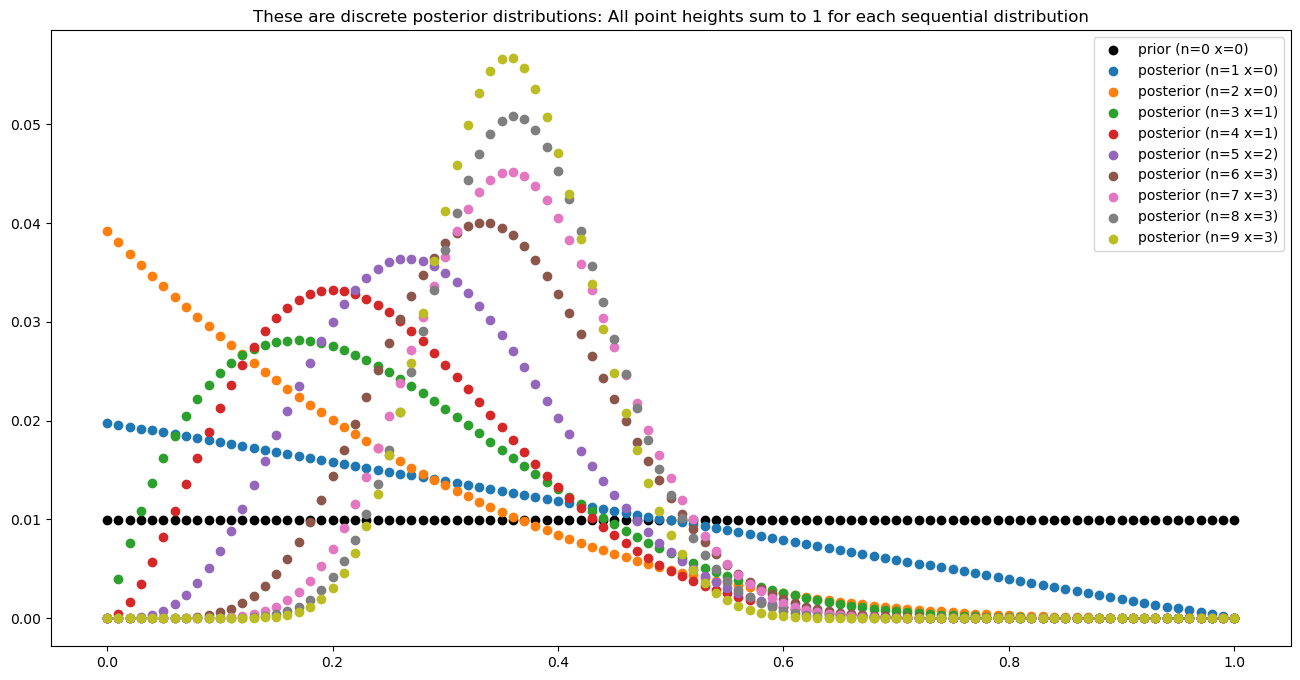

In [1]:
# Q1

import numpy as np; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones_like(parameter_domain)/101 

observations = [0,0,1,0,1,1,0,0,0]

n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for obs in observations:
    n += 1
    x += obs
    likelihood = (parameter_domain**x)*((1-parameter_domain)**(n-x))
    posterior = likelihood*prior
    posterior_sum = np.sum(posterior)
    assert posterior_sum > 0, f"Posterior sum is zero. Check calculations!"
    posterior = posterior/posterior_sum
    assert np.isclose(posterior.sum(), 1.0, atol=1e-12), f"Posterior does not sum to 1, sum={posterior.sum()}"
    print(f"After observation {obs}, n={n}, x={x}, posterior sum={posterior.sum()}")
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")
    prior = posterior

plt.legend();
plt.show()

Arm1 chosen 21 times; Arm2 chosen 479 times.
Final posterior for arm1: Beta(alpha1=7, beta1=16)
Final posterior for arm2: Beta(alpha2=280, beta2=201)
Final average reward: 0.570


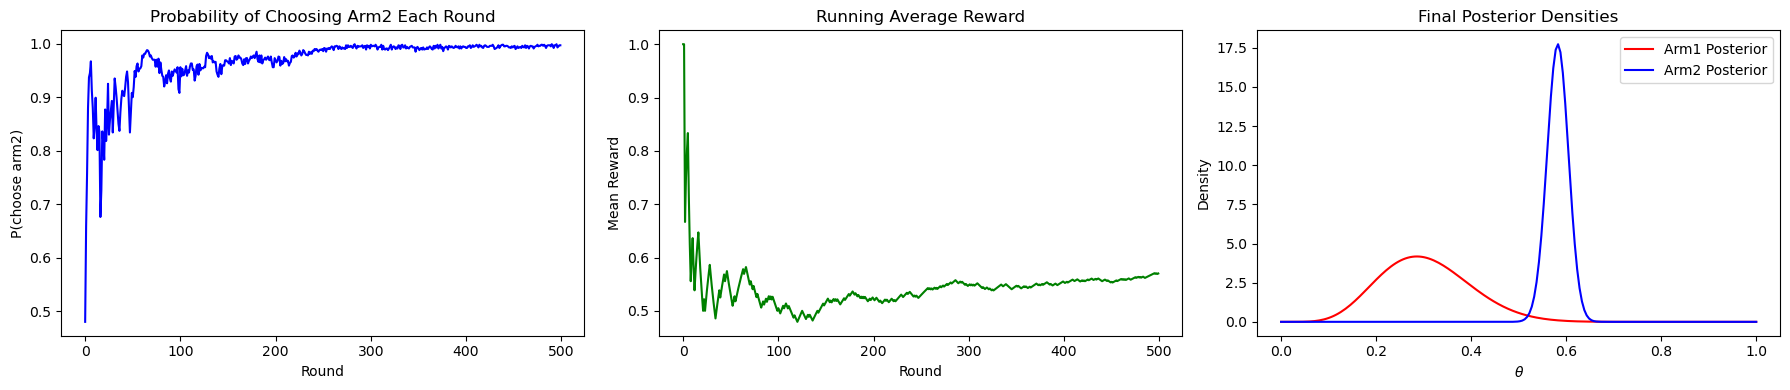

In [2]:
# Q2
from scipy import stats
theta1_true, theta2_true = 0.3, 0.6
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

T = 500

chosen_arm_history = []
success_history = []
p2_probability_history = []
avg_reward_history = []

total_reward = 0

for t in range(1, T+1):
    num_samples = 1000
    sample1 = np.random.beta(alpha1, beta1, size=num_samples)
    sample2 = np.random.beta(alpha2, beta2, size=num_samples)
    p = np.mean(sample1 < sample2)

    p2_probability_history.append(p)

    if np.random.rand() < p:
        chosen_arm = 2
        reward = 1 if (np.random.rand() < theta2_true) else 0
    else:
        chosen_arm = 1
        reward = 1 if (np.random.rand() < theta1_true) else 0
    chosen_arm_history.append(chosen_arm)
    success_history.append(reward)
    total_reward += reward

    if chosen_arm == 1:
        alpha1 += reward
        beta1 += 1 - reward
    else:
        alpha2 += reward
        beta2 += 1 - reward
    avg_reward_history.append(total_reward / t)

chosen_arm_array = np.array(chosen_arm_history)
num_arm1 = np.sum(chosen_arm_array == 1)
num_arm2 = np.sum(chosen_arm_array == 2)

print(f"Arm1 chosen {num_arm1} times; Arm2 chosen {num_arm2} times.")
print(f"Final posterior for arm1: Beta(alpha1={alpha1}, beta1={beta1})")
print(f"Final posterior for arm2: Beta(alpha2={alpha2}, beta2={beta2})")
print(f"Final average reward: {avg_reward_history[-1]:.3f}")

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].plot(p2_probability_history, color='blue')
ax[0].set_title("Probability of Choosing Arm2 Each Round")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("P(choose arm2)")

ax[1].plot(avg_reward_history, color='green')
ax[1].set_title("Running Average Reward")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Mean Reward")

grid = np.linspace(0,1,200)
posterior_arm1 = stats.beta.pdf(grid, alpha1, beta1)
posterior_arm2 = stats.beta.pdf(grid, alpha2, beta2)
ax[2].plot(grid, posterior_arm1, label="Arm1 Posterior", color='red')
ax[2].plot(grid, posterior_arm2, label="Arm2 Posterior", color='blue')
ax[2].set_title("Final Posterior Densities")
ax[2].set_xlabel(r"$\theta$")
ax[2].set_ylabel("Density")
ax[2].legend()

plt.tight_layout()
plt.show()


===== Analysis 1: Independent Beta-Binomial =====
Arm picks:    [  5  59 936]
Final alpha:  [  1.  41. 738.]
Final beta:   [  6.  20. 200.]
Mean Reward:  0.777

===== Analysis 2: Single Dirichlet-Multinomial =====
Dirichlet parameters: [  1.  41. 738.]
Posterior mean (p1, p2, p3): [0.00128205 0.0525641  0.94615385]

If each arm truly has its own independant success/failure process, then Beta-Binomial is correct since it treats each arm's success probability as an independent Bernoullie process.
On the other hand, Dirichlet-Multinomial treats which arm is chosen as a single categorical outcome with probabilities that must sum to 1.
For e.g. if we are testing 3 diff. versions of a website, and each user is independently assigned one of the three arms, use Beta-Binomial. If the user has a choice of which arm to use, use Dirichlet-Multinomial.


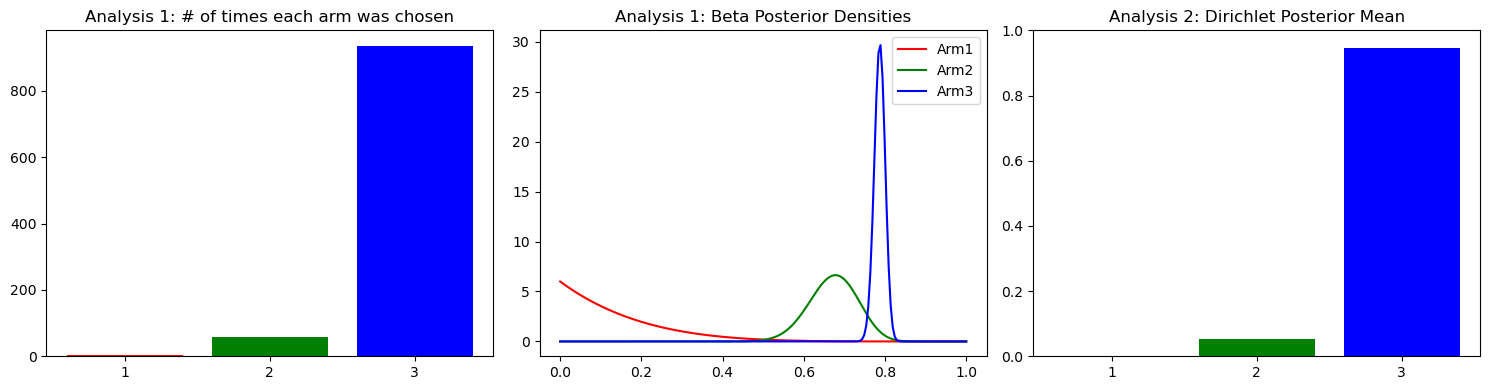

In [3]:
#Q3
theta_true = np.array([0.3, 0.6, 0.8])
T = 1000

alpha_bb = np.ones(3)
beta_bb = np.ones(3)

chosen_arm_history = []
reward_history = []

for t in range(T):
    samples = np.random.beta(alpha_bb, beta_bb)
    chosen_arm = np.argmax(samples)
    chosen_arm_history.append(chosen_arm)
    reward = 1 if (np.random.rand() < theta_true[chosen_arm]) else 0
    reward_history.append(reward)
    alpha_bb[chosen_arm] += reward
    beta_bb[chosen_arm] += 1 - reward

chosen_arm_history = np.array(chosen_arm_history)
reward_history = np.array(reward_history)
counts = np.bincount(chosen_arm_history, minlength=3)
mean_reward = reward_history.mean()
print("===== Analysis 1: Independent Beta-Binomial =====")
print(f"Arm picks:    {counts}")
print(f"Final alpha:  {alpha_bb}")
print(f"Final beta:   {beta_bb}")
print(f"Mean Reward:  {mean_reward:.3f}")

dirichlet_alpha = np.ones(3)

for t in range(T):
    arm = chosen_arm_history[t]
    r = reward_history[t]
    if r ==1:
        dirichlet_alpha[arm] += 1

print("\n===== Analysis 2: Single Dirichlet-Multinomial =====")
print(f"Dirichlet parameters: {dirichlet_alpha}")
dirichlet_mean = dirichlet_alpha / dirichlet_alpha.sum()
print(f"Posterior mean (p1, p2, p3): {dirichlet_mean}")

print("\nIf each arm truly has its own independant success/failure process, then Beta-Binomial is correct since it treats each arm's success probability as an independent Bernoullie process.")
print("On the other hand, Dirichlet-Multinomial treats which arm is chosen as a single categorical outcome with probabilities that must sum to 1.")
print("For e.g. if we are testing 3 diff. versions of a website, and each user is independently assigned one of the three arms, use Beta-Binomial. If the user has a choice of which arm to use, use Dirichlet-Multinomial.")
fig, ax = plt.subplots(1,3, figsize=(15,4))

# 1. Number of times each arm was chosen
ax[0].bar([1,2,3], counts, color=['red','green','blue'])
ax[0].set_xticks([1,2,3])
ax[0].set_title("Analysis 1: # of times each arm was chosen")

# 2. Beta posteriors from Analysis 1
grid = np.linspace(0,1,200)
for j, col in zip(range(3), ['red','green','blue']):
    pdf_j = stats.beta.pdf(grid, alpha_bb[j], beta_bb[j])
    ax[1].plot(grid, pdf_j, color=col, label=f"Arm{j+1}")
ax[1].set_title("Analysis 1: Beta Posterior Densities")
ax[1].legend()

# 3. Dirichlet posterior from Analysis 2 (visualize a few 2D slices or bar plot)
# For quick illustration, just show the posterior *mean*:
ax[2].bar([1,2,3], dirichlet_mean, color=['red','green','blue'])
ax[2].set_xticks([1,2,3])
ax[2].set_ylim(0,1)
ax[2].set_title("Analysis 2: Dirichlet Posterior Mean")

plt.tight_layout()
plt.show()